In [31]:
import time
import numpy as np

# run `pip install scikit-image` to install skimage, if you haven't done so
from skimage import io, color
from skimage.transform import rescale



In [32]:
a = np.random.randn(3,4)
a.shape

(3, 4)

In [33]:
len(a)

3

In [39]:
def distance(x, X):
    return np.linalg.norm(x-X, axis=1)
    # raise NotImplementedError('distance function not implemented!')

def gaussian(dist, bandwidth):
    b = bandwidth
    d2 = dist*dist
    m = np.max(d2)
    r = np.exp(-0.5*(d2-m) / (b*b)) / np.sum(np.exp(-0.5*(d2-m) / (b*b))) 
    return r
    # raise NotImplementedError('gaussian function not implemented!')

def update_point(weight, X):
    return np.sum(X*weight, axis=0)
    # raise NotImplementedError('update_point function not implemented!')

def meanshift_step(X, bandwidth=2.5):
    # calculate mean for all x
    # clist = []
    X = X.copy() # farkli bandwidth lerde loop da denedigim icin, bozmamak icin
    for i in range(len(X)):
        x = X[i]
        dist = distance(x,X)
        w = gaussian(dist, bandwidth=bandwidth)
        w = w.reshape(-1,1)
        c = update_point(w, X)
        X[i] = c
        # clist.append(c)
    # X = np.array(clist)
    return X
    # raise NotImplementedError('meanshift_step function not implemented!')

In [35]:
def meanshift(X, b=2.5):
    for _ in range(20):
        X = meanshift_step(X,b)
    return X

In [141]:
for x in X:
    break

In [142]:
x

array([ 76.20993261,   1.34686303, -26.42193298])

In [143]:
X

array([[ 76.20993261,   1.34686303, -26.42193298],
       [ 76.48118903,   1.33709607, -26.40532841],
       [ 76.67024524,   1.33033265, -26.39378359],
       ...,
       [ 26.05456167,   1.96580296,  -2.69142186],
       [ 25.22320874,   1.97612992,  -2.70489147],
       [ 25.3428146 ,   1.97464398,  -2.70297594]])

In [116]:
np.linalg.norm(x-X, axis=1).shape

(20000,)

In [117]:
dist = np.linalg.norm(x-X, axis=1)

In [119]:
b = bandwidth
d2 = dist*dist
d2.shape

(20000,)

In [120]:
m = np.max(d2)
m

4964.582532821574

In [121]:

r = np.exp((d2-m) / (b*b)) / np.sum(np.exp((d2-m) / (b*b))) 

In [123]:
r

array([8.60517868e-127, 6.36191085e-125, 1.29497324e-123, ...,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

In [125]:
np.sum(r)

0.9999999999999998

In [127]:
np.max(r)

0.9858869944736638

In [129]:
np.argmax(r)

10547

In [115]:
r.shape

(20000,)

In [131]:
weight = r.reshape(-1,1)
np.sum(X*weight, axis=0)

array([93.7010913 ,  0.421423  , 14.27213899])

In [134]:
(X*weight).shape

(20000, 3)

In [135]:
X.shape

(20000, 3)

In [136]:
weight.shape

(20000, 1)

In [139]:
X

array([[ 76.20993261,   1.34686303, -26.42193298],
       [ 76.48118903,   1.33709607, -26.40532841],
       [ 76.67024524,   1.33033265, -26.39378359],
       ...,
       [ 26.05456167,   1.96580296,  -2.69142186],
       [ 25.22320874,   1.97612992,  -2.70489147],
       [ 25.3428146 ,   1.97464398,  -2.70297594]])

In [140]:
weight

array([[8.60517868e-127],
       [6.36191085e-125],
       [1.29497324e-123],
       ...,
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000]])

In [138]:
X*weight

array([[ 6.55800087e-125,  1.15899970e-126, -2.27365454e-125],
       [ 4.86566506e-123,  8.50648602e-125, -1.67988345e-123],
       [ 9.92859156e-122,  1.72274517e-123, -3.41792434e-122],
       ...,
       [ 0.00000000e+000,  0.00000000e+000, -0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000, -0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000, -0.00000000e+000]])

In [24]:
scale = 0.5    # downscale the image to run faster

# Load image and convert it to CIELAB space
image = rescale(io.imread('eth.jpg'), scale, channel_axis=-1)
image_lab = color.rgb2lab(image)
shape = image_lab.shape # record image shape
image_lab = image_lab.reshape([-1, 3])  # flatten the image

(20000, 3)

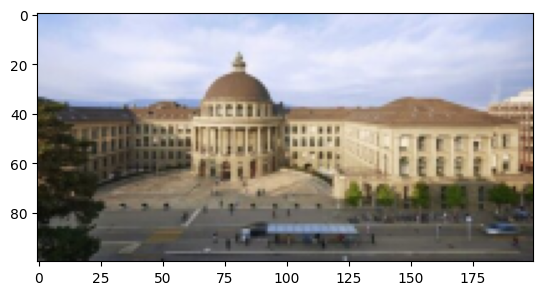

In [25]:
import matplotlib.pyplot as plt

plt.imshow(image)
image_lab.shape

In [28]:
X = image_lab

In [29]:
X.shape

(20000, 3)

In [30]:
X[0].shape

(3,)

In [8]:
x = X[0]

In [9]:
(x-X).shape

(20000, 3)

In [7]:
np.linalg.norm(x-X, axis=1)

array([ 0.        ,  0.27193961,  0.4614687 , ..., 55.48947178,
       56.23646544, 56.12884041])

In [8]:
dist = distance(x,X)

NameError: name 'distance' is not defined

In [ ]:
distance(x,X)

In [10]:
n, c = X.shape

In [11]:
# mm = (X.reshape(n,1,c) - X)

In [83]:
np.sum(mm[0] != x-X)

0

In [84]:
mm.shape

(20000, 20000, 3)

array([ 0.        ,  0.27193961,  0.4614687 , ..., 55.48947178,
       56.23646544, 56.12884041])

In [72]:
# np.linalg.norm(mm[0], axis=1) == distance(x,X)

array([ True,  True,  True, ...,  True,  True,  True])

In [69]:
mm.shape

(20000, 20000, 3)

In [76]:
dd[0].shape

(3,)

In [77]:
distance(x,X).shape

(20000,)

In [79]:
tmp = np.random.randn(10,10,3)

In [86]:
np.linalg.norm(tmp, axis=2).shape

(10, 10)

In [82]:
tmp[0].shape

(10, 3)

In [ ]:
dd = np.linalg.norm(mm, axis=2)

In [89]:
dist = dd
dd.shape

(20000, 20000)

In [91]:
bandwidth = 2.5

In [92]:
b = bandwidth
d2 = dist*dist
d2.shape

(20000, 20000)

In [94]:
m = np.max(d2,axis=1)
m.shape

(20000,)

In [97]:
(d2-m)[0]

array([-6185.95955858, -6224.46834924, -6251.30951631, ...,
       -1788.27734862, -1818.47907933, -1814.13580672])

In [98]:
d2[0]-m[0]

array([-6185.95955858, -6185.88560742, -6185.74660521, ...,
       -3106.8780802 , -3023.41951295, -3035.51283248])

In [ ]:

r = np.exp((d2-m) / (b*b)) / np.sum(np.exp((d2-m) / (b*b)), axis=1) 

In [25]:
bandwidth = 2.5

In [26]:
b = bandwidth
d2 = dist*dist
m = np.max(d2)
r = np.exp((d2-m) / (b*b)) / np.sum(np.exp((d2-m) / (b*b))) 

In [27]:
r.shape

(20000,)

In [28]:
np.exp((d2-m) / (b*b)).shape

(20000,)

In [29]:
dist.shape

(20000,)

In [16]:
dist

array([ 0.        ,  0.27193961,  0.4614687 , ..., 55.48947178,
       56.23646544, 56.12884041])

In [17]:
r = gaussian(dist, bandwidth=0.1)

In [18]:
r

array([0., 0., 0., ..., 0., 0., 0.])

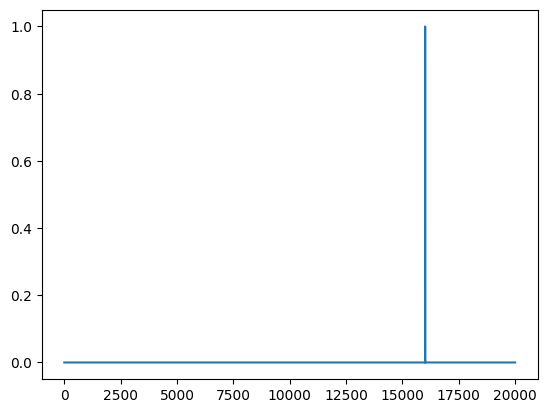

In [19]:
plt.plot(r)

In [20]:
b = 10
d2 = dist*dist
m = np.max(d2)
r = np.exp((d2-m) / (b*b)) / np.sum(np.exp((d2-m) / (b*b))) 
r

array([6.14798242e-29, 6.15253060e-29, 6.16108870e-29, ...,
       1.44881713e-15, 3.33787081e-15, 2.95766447e-15])

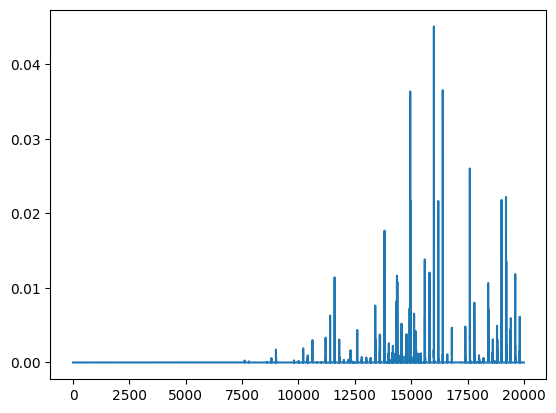

In [21]:
plt.plot(r)

In [22]:
np.sum(r)

0.9999999999999999

In [23]:
m = np.max(dist*dist)
m

6185.959558575029

In [32]:
distance(X,X).shape

(20000,)

In [34]:
distance(x,X).shape

(20000,)

In [18]:
dist = distance(x,X)
# r = gaussian(dist, bandwidth=0.1)
weight = gaussian(dist, bandwidth=2)


In [19]:
r.shape

(20000,)

In [22]:
weight.shape

(20000,)

In [30]:
X.shape

(20000, 3)

In [35]:
w = weight.reshape(-1,1)

In [36]:
(X*w).shape

(20000, 3)

In [39]:
np.sum(X*w, axis=0)

array([ 3.38643581, -1.47700053,  3.09420101])

In [43]:
update_point(weight.reshape(-1,1), X)

array([ 3.38643581, -1.47700053,  3.09420101])

In [12]:
x

array([ 76.20993261,   1.34686303, -26.42193298])

In [29]:
weight.shape
weight.reshape(-1,1).shape

(20000, 1)

5.003636290720427

In [28]:
bandwidth = 2.5

In [49]:
# calculate mean for all x
clist = []
for x in X:
    dist = distance(x,X)
    w = gaussian(dist, bandwidth=bandwidth)
    w = w.reshape(-1,1)
    c = update_point(w, x)
    clist.append(c)
X = np.array(clist)

In [48]:
np.array(clist).shape

(20000, 3)

In [45]:
X.shape

(20000, 3)

In [ ]:
# Run your mean-shift algorithm
t = time.time()
X = meanshift(image_lab)
t = time.time() - t
print ('Elapsed time for mean-shift: {}'.format(t))

In [ ]:

# Load label colors and draw labels as an image
colors = np.load('colors.npz')['colors']
colors[colors > 1.0] = 1
colors[colors < 0.0] = 0

centroids, labels = np.unique((X / 4).round(), return_inverse=True, axis=0)

result_image = colors[labels].reshape(shape)
result_image = rescale(result_image, 1 / scale, order=0, channel_axis=-1)     # resize result image to original resolution
result_image = (result_image * 255).astype(np.uint8)
io.imsave('result.png', result_image)


In [43]:
# try with different bandwidths
b_list = [1, 2.5, 3, 5, 7]
# b_list = [1, 2.5]

In [44]:
import os
path = "res3"
# Check whether the specified path exists or not
if not os.path.exists(path):
    os.makedirs(path)

In [45]:
for b in b_list:
    scale = 0.5    # downscale the image to run faster
    
    # Load image and convert it to CIELAB space
    image = rescale(io.imread('eth.jpg'), scale, channel_axis=-1)
    image_lab = color.rgb2lab(image)
    shape = image_lab.shape # record image shape
    image_lab = image_lab.reshape([-1, 3])  # flatten the image
    
    # Run your mean-shift algorithm
    t = time.time()
    X = meanshift(image_lab,b=b)
    t = time.time() - t
    text = 'Elapsed time for mean-shift: {}'.format(t)
    print(text)

    f = open(path + "/time{}.txt".format(b), "w")
    f.write(text)
    f.close()

    # Load label colors and draw labels as an image
    colors = np.load('colors.npz')['colors']
    colors[colors > 1.0] = 1
    colors[colors < 0.0] = 0
    
    centroids, labels = np.unique((X / 4).round(), return_inverse=True, axis=0)
    
    try:
        result_image = colors[labels].reshape(shape)
        result_image = rescale(result_image, 1 / scale, order=0, channel_axis=-1)     # resize result image to original resolution
        result_image = (result_image * 255).astype(np.uint8)
        io.imsave(path + '/result{}.png'.format(b), result_image)
    except Exception as e: 
        print(e)
        f = open(path + "/error{}.txt".format(b), "w")
        f.write(str(e))
        f.close()

/var/folders/dp/4fr32ggj4tb41_86_5pj1l8h0000gn/T/ipykernel_73244/21559629.py:9: RuntimeWarning: overflow encountered in exp
  r = np.exp(-0.5*(d2-m) / (b*b)) / np.sum(np.exp(-0.5*(d2-m) / (b*b)))
/var/folders/dp/4fr32ggj4tb41_86_5pj1l8h0000gn/T/ipykernel_73244/21559629.py:9: RuntimeWarning: invalid value encountered in divide
  r = np.exp(-0.5*(d2-m) / (b*b)) / np.sum(np.exp(-0.5*(d2-m) / (b*b)))


Elapsed time for mean-shift: 458.089638710022
index 13335 is out of bounds for axis 0 with size 24
Elapsed time for mean-shift: 608.4115810394287
Elapsed time for mean-shift: 590.9418880939484
Elapsed time for mean-shift: 586.2665758132935
Elapsed time for mean-shift: 612.0753970146179


In [46]:
import os

file = '/Users/alpayozkan/Music/Music/hungdance.mp3'

# play sound
# file = "note.wav"
print('playing sound using native player')
os.system("afplay " + file)

playing sound using native player


2

In [ ]:
b = 3

scale = 0.5    # downscale the image to run faster

# Load image and convert it to CIELAB space
image = rescale(io.imread('eth.jpg'), scale, channel_axis=-1)
image_lab = color.rgb2lab(image)
shape = image_lab.shape # record image shape
image_lab = image_lab.reshape([-1, 3])  # flatten the image

# Run your mean-shift algorithm
t = time.time()
X = meanshift(image_lab,b=b)
t = time.time() - t
text = 'Elapsed time for mean-shift: {}'.format(t)
print (text)

f = open("time{}.txt".format(b), "w")
f.write(text)
f.close()

# Load label colors and draw labels as an image
colors = np.load('colors.npz')['colors']
colors[colors > 1.0] = 1
colors[colors < 0.0] = 0

centroids, labels = np.unique((X / 4).round(), return_inverse=True, axis=0)

try:
    result_image = colors[labels].reshape(shape)
    result_image = rescale(result_image, 1 / scale, order=0, channel_axis=-1)     # resize result image to original resolution
    result_image = (result_image * 255).astype(np.uint8)
    io.imsave('result{}.png'.format(b), result_image)
except Exception as e: 
    print(e)
    f = open("error{}.txt".format(b), "w")
    f.write(str(e))
    f.close()

In [90]:
3

3

In [72]:
labels

array([677, 677, 677, ..., 182, 132, 132])

In [73]:
labels.shape

(20000,)

In [74]:
centroids.shape

(802, 3)

In [75]:
X.shape

(20000, 3)

index 677 is out of bounds for axis 0 with size 24


In [60]:
colors.shape

(24, 3)

In [61]:
colors

array([[8.94117647e-01, 1.01960784e-01, 1.09803922e-01],
       [2.15686275e-01, 4.94117647e-01, 7.21568627e-01],
       [3.01960784e-01, 6.86274510e-01, 2.90196078e-01],
       [5.96078431e-01, 3.05882353e-01, 6.39215686e-01],
       [1.00000000e+00, 4.98039216e-01, 3.58602037e-16],
       [1.00000000e+00, 1.00000000e+00, 2.00000000e-01],
       [6.50980392e-01, 3.37254902e-01, 1.56862745e-01],
       [9.68627451e-01, 5.05882353e-01, 7.49019608e-01],
       [6.00000000e-01, 6.00000000e-01, 6.00000000e-01],
       [1.00000000e+00, 9.17647059e-01, 8.47058824e-01],
       [4.94117647e-01, 0.00000000e+00, 1.84313725e-01],
       [7.92156863e-01, 7.29411765e-01, 3.72549020e-01],
       [5.25490196e-01, 4.78431373e-01, 3.58602037e-16],
       [9.29411765e-01, 6.50980392e-01, 5.76470588e-01],
       [5.05882353e-01, 4.03921569e-01, 4.15686275e-01],
       [7.80392157e-01, 3.56862745e-01, 4.43137255e-01],
       [6.86274510e-01, 5.37254902e-01, 3.52941176e-01],
       [6.27450980e-01, 8.23529

In [62]:
np.unique((X / 4).round(), return_inverse=True, axis=0)

(array([[ 1., -1.,  0.],
        [ 1., -1.,  1.],
        [ 1.,  0., -1.],
        ...,
        [24.,  0., -1.],
        [24.,  1., -2.],
        [24.,  1., -1.]]),
 array([677, 677, 677, ..., 182, 132, 132]))

In [70]:
np.unique((X / 4).round(), return_inverse=True)

(array([-7., -6., -5., -4., -3., -2., -1., -0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18.,
        19., 20., 21., 22., 23., 24.]),
 array([26,  7,  0, ..., 13,  7,  6]))

In [69]:
X.shape

(20000, 3)

In [71]:
np.unique((X / 4).round(), return_inverse=True)[0].shape

(32,)